## Regressor Problem

In [300]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/SUMIT/Assignments/Projects/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values in the datasets.

In [7]:
# droping unwanted columns
df= df.drop(["Unnamed: 0", 'Date', '4046', '4225', '4770'],axis=1)
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.drop_duplicates()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [20]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

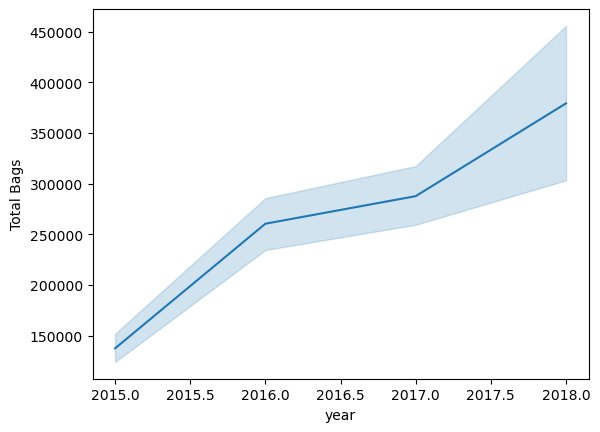

In [22]:
sns.lineplot(x='year', y='Total Bags', data=df)
plt.show()

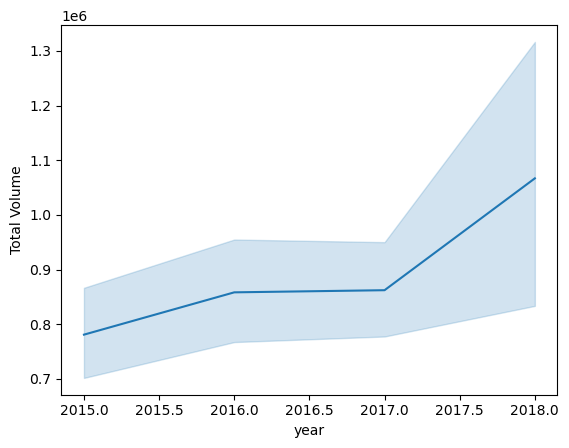

In [23]:
sns.lineplot(x='year', y='Total Volume', data=df)
plt.show()

From the line chart above we see that majority of avocado sold are done in the 2018, and minority sold in 2015

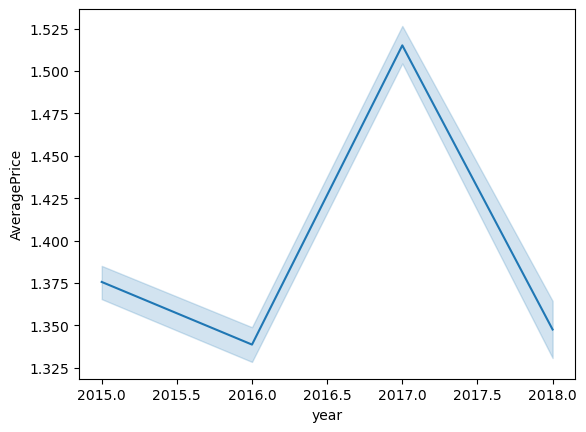

In [24]:
sns.lineplot(x='year', y='AveragePrice', data=df)
plt.show()

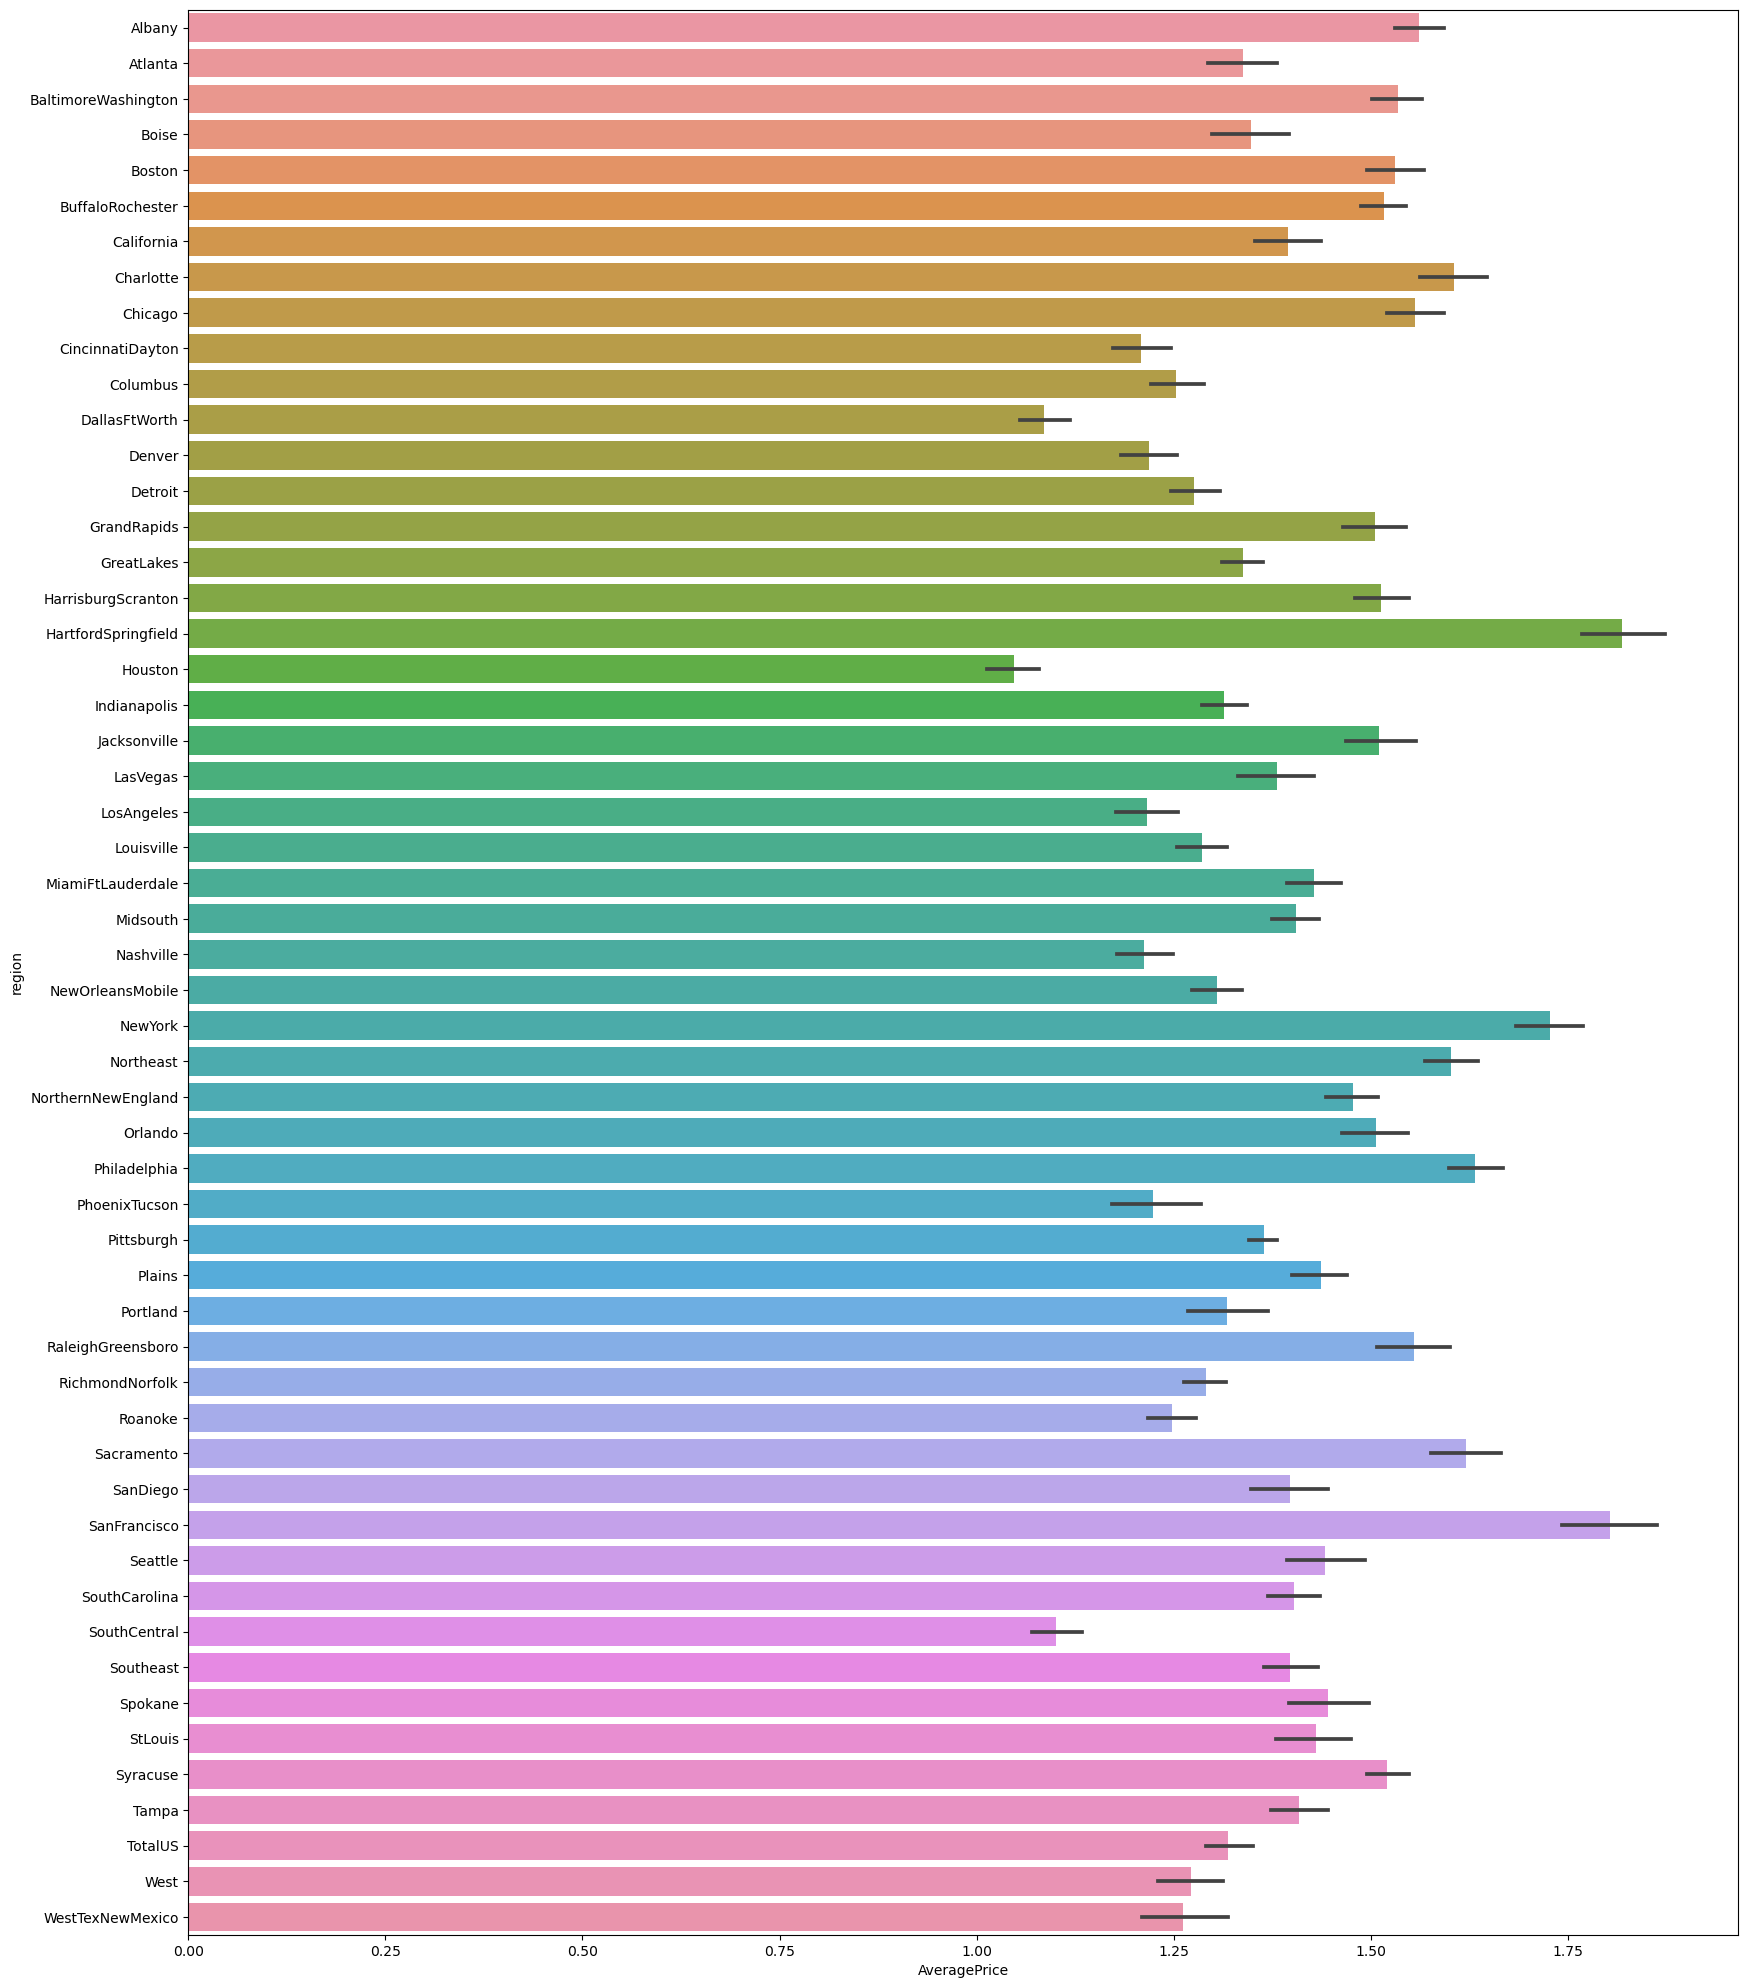

In [29]:
plt.figure(figsize=(20,25))
sns.barplot(y='region', x='AveragePrice' , data= df)
plt.show()

In above plot shows which region have lowest and highest average price of avacado.
Region which have lowest price is Houston.
HartfortSpringfield region is the highest average price.

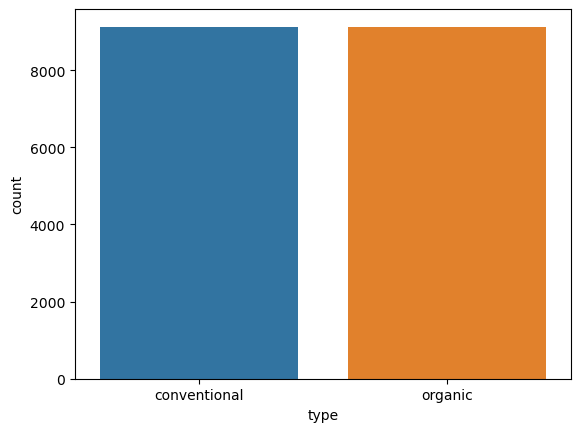

In [31]:
sns.countplot(x='type', data=df)
plt.show()

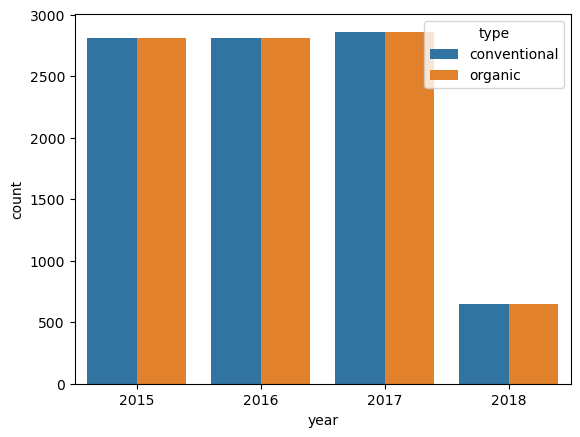

In [33]:
sns.countplot(x='year',hue='type', data=df)
plt.show()

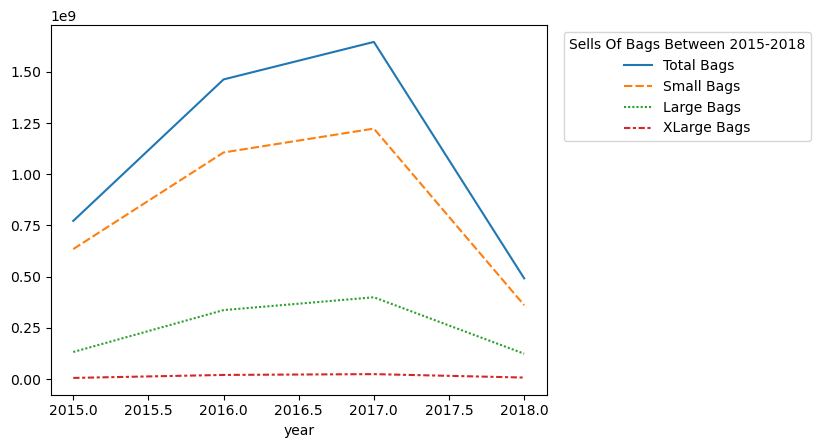

In [50]:
df_2 =pd.DataFrame(df.groupby('year')[["Total Bags","Small Bags","Large Bags","XLarge Bags"]].sum())

sns.lineplot(data =df_2)
plt.legend(title ="Sells Of Bags Between 2015-2018", loc = "upper left" ,bbox_to_anchor=(1.02,1))
plt.show()

small and large bags tend to follow the same trend over the years having a high sells over the years.

In [73]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Some columns have object or category data type.


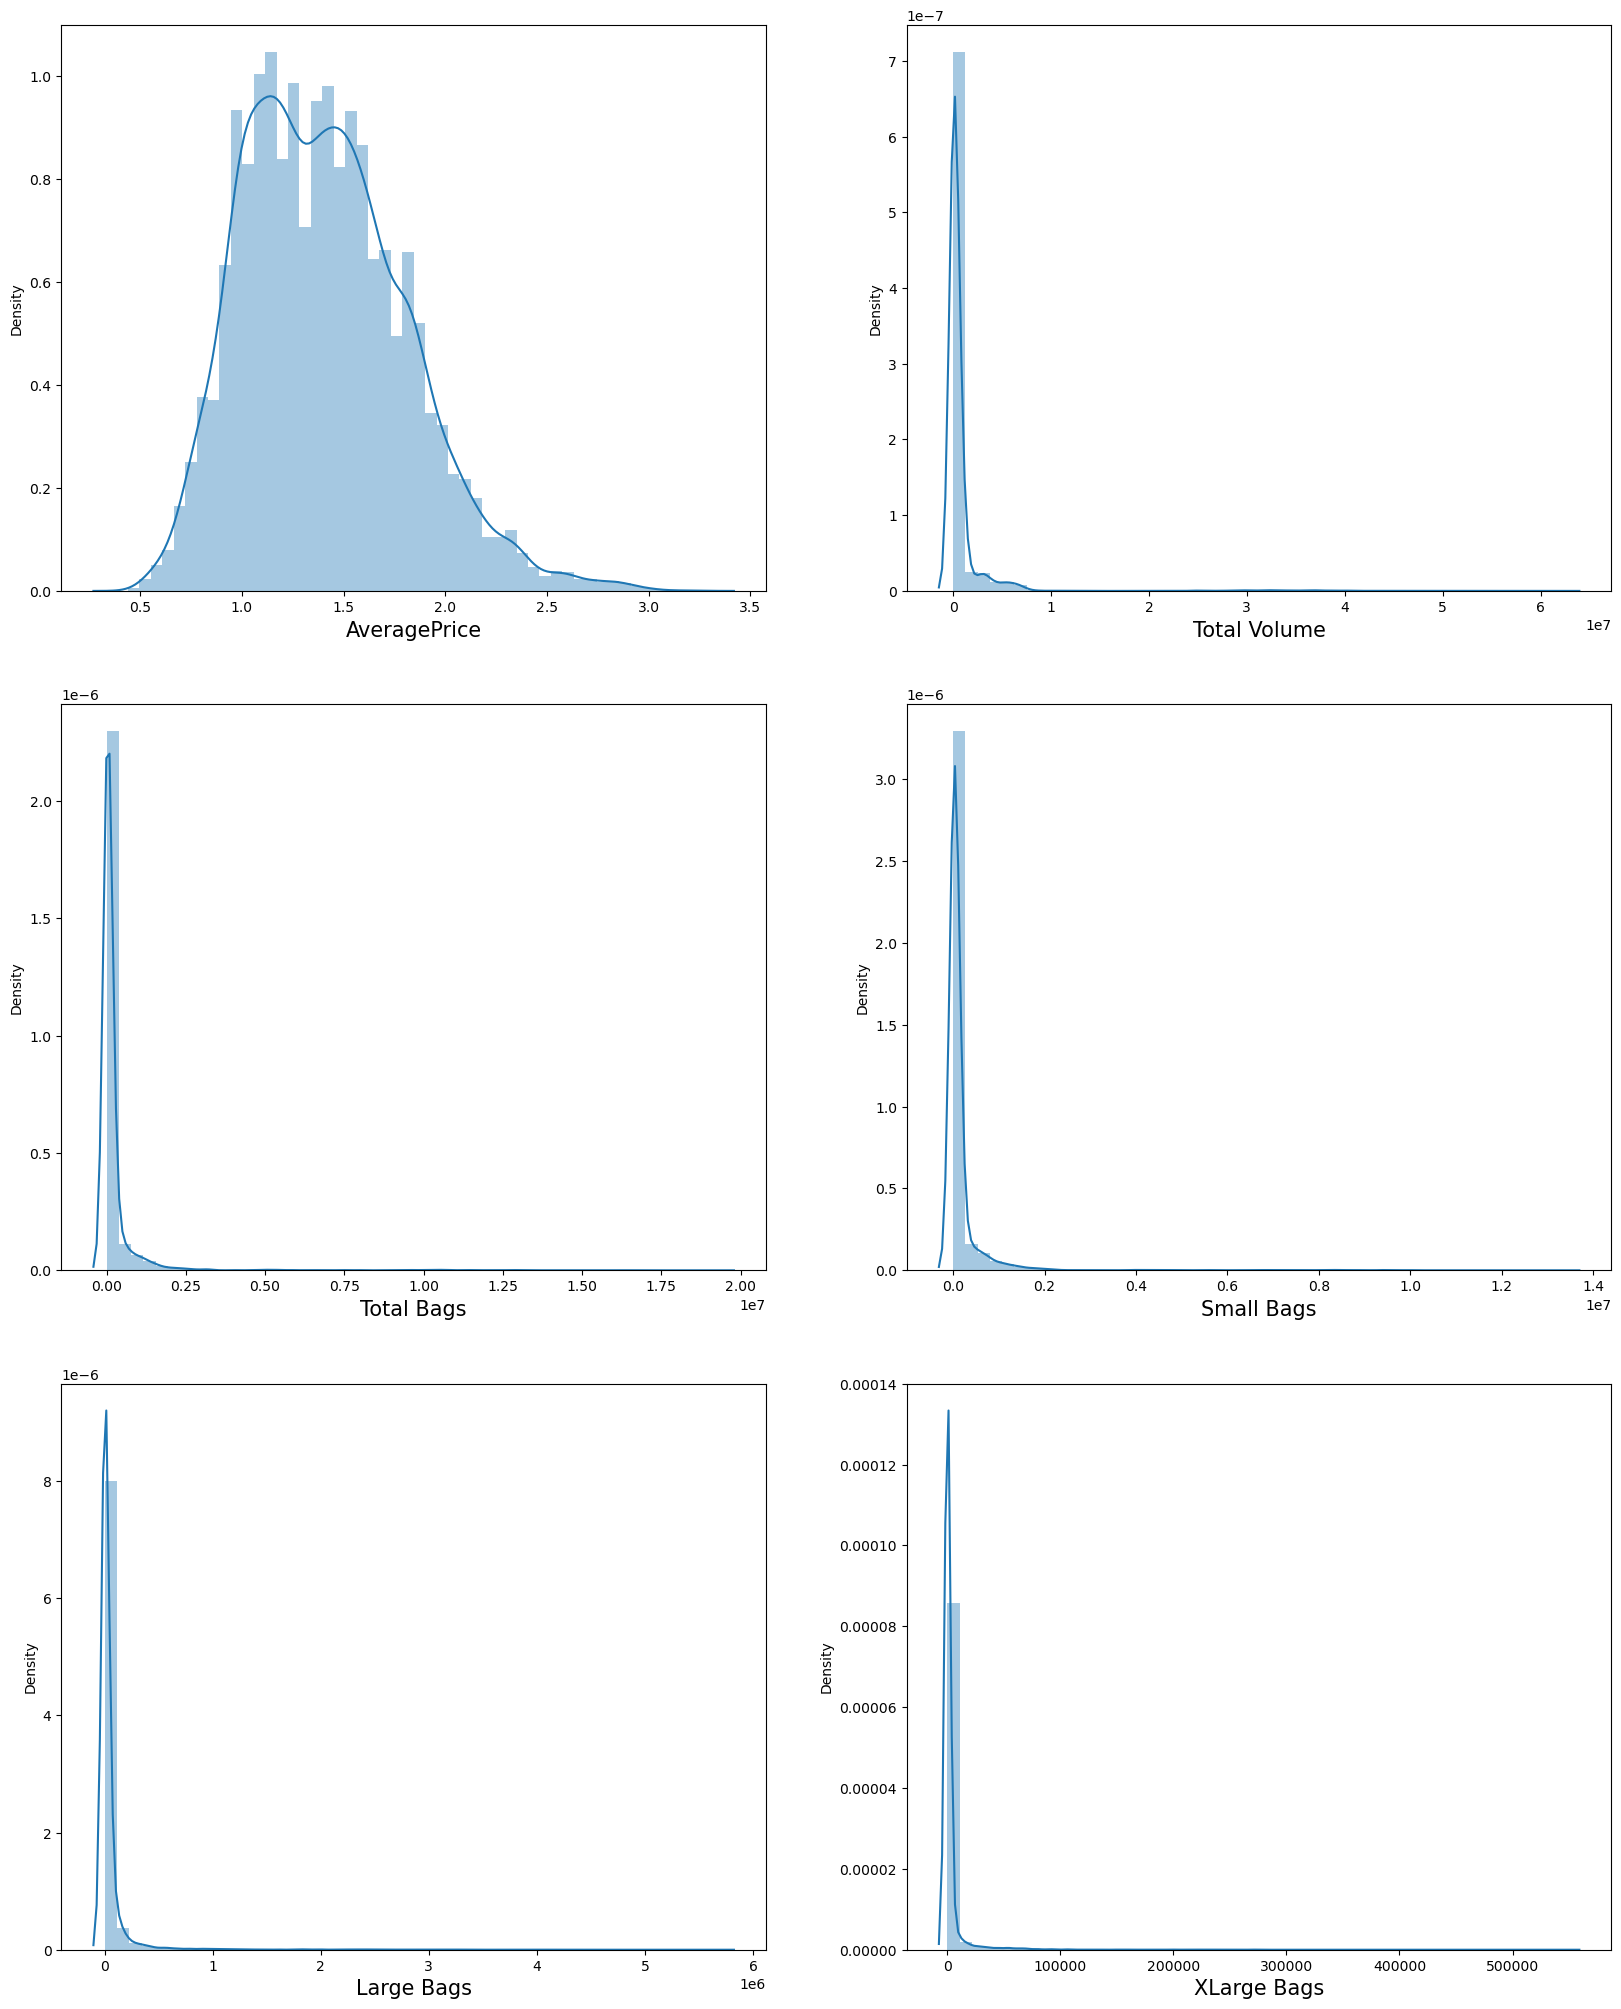

In [86]:
#checking the distribution of data set
plt.figure(figsize=(20,25))
plotnumber =1
try:
    for column in df:
        if plotnumber<=10:
            ax = plt.subplot(3,2,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=15)
        plotnumber+=1
    plt.show()
except:
    print("Some columns have object or category data type.")

Some columns have object or category data type.


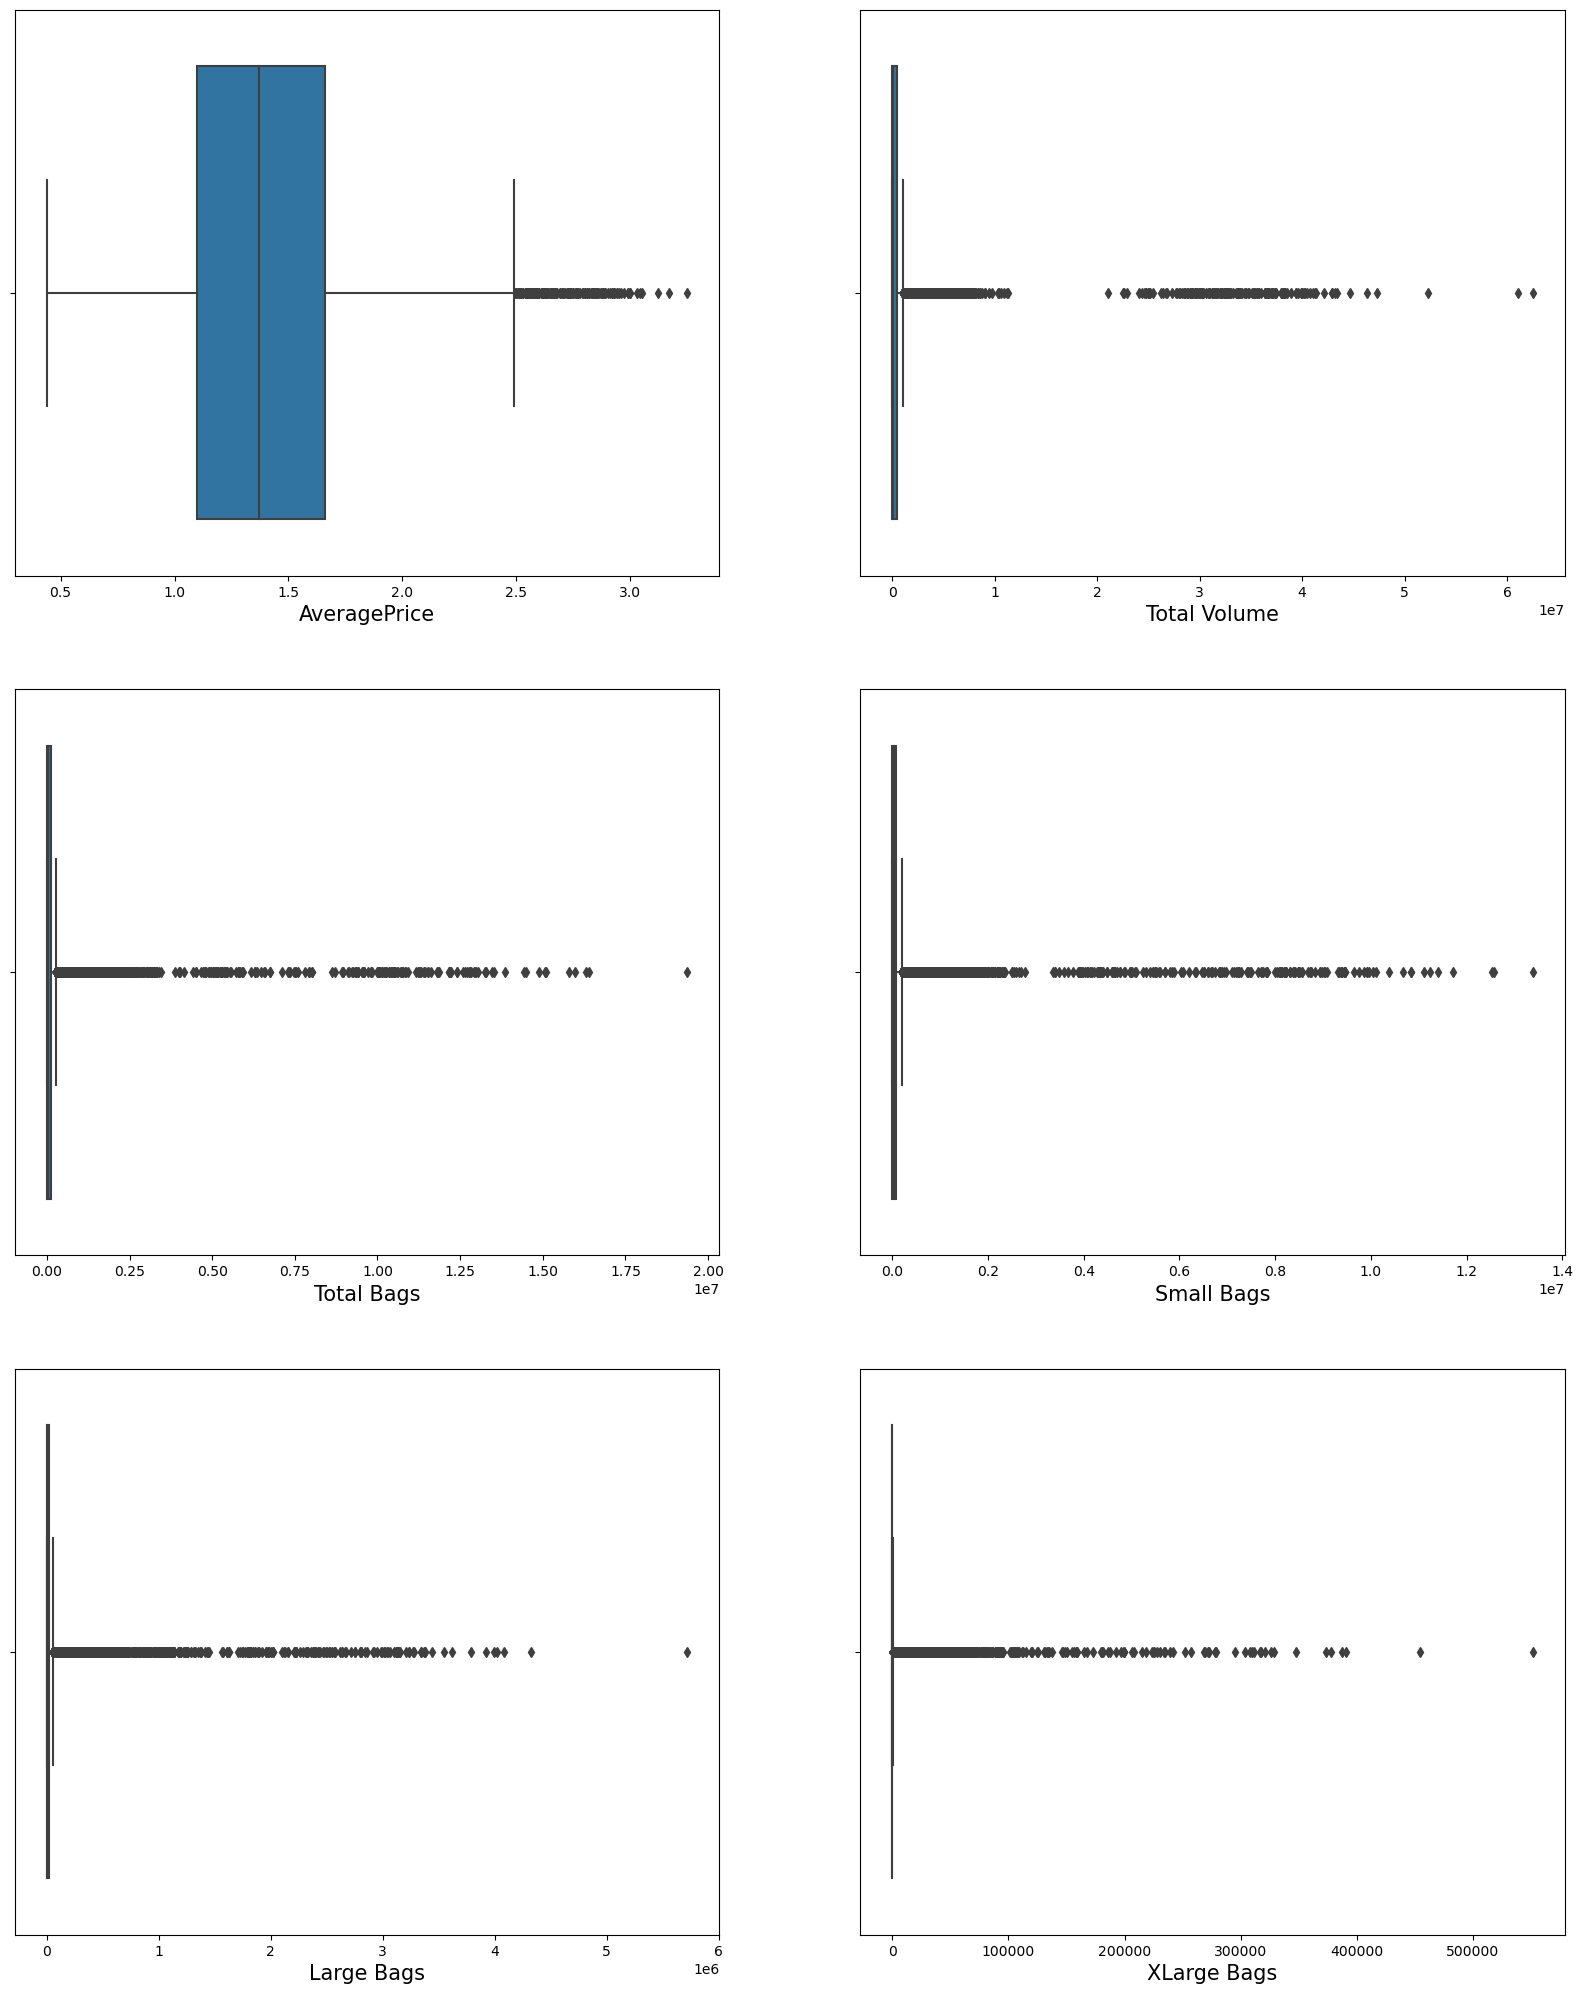

In [87]:
plt.figure(figsize=(20,25))
plotnumber =1
try:
    for column in df:
        if plotnumber<=10:
            ax = plt.subplot(3,2,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=15)
        plotnumber+=1
    plt.show()
except:
    print("Some columns have object or category data type.")

Here we can see right skewness in distribution graph and huge amount of outliers in our dataset. Let's treat the outliers

In [254]:
df_new= df.copy()
df_new

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are many ways to treat outliers.
I'm using quantile range and delete some outliers 

In [255]:

Q1= np.percentile(df_new['Total Volume'],25)
Q3= np.percentile(df_new['Total Volume'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_new=df_new[(df_new['Total Volume']>outlier_down) & (df_new['Total Volume']<outlier_up)]

In [256]:
Q1= np.percentile(df_new['Total Bags'],25)
Q3= np.percentile(df_new['Total Bags'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_new=df_new[(df_new['Total Bags']>outlier_down) & (df_new['Total Bags']<outlier_up)]

Some columns have object or category data type.


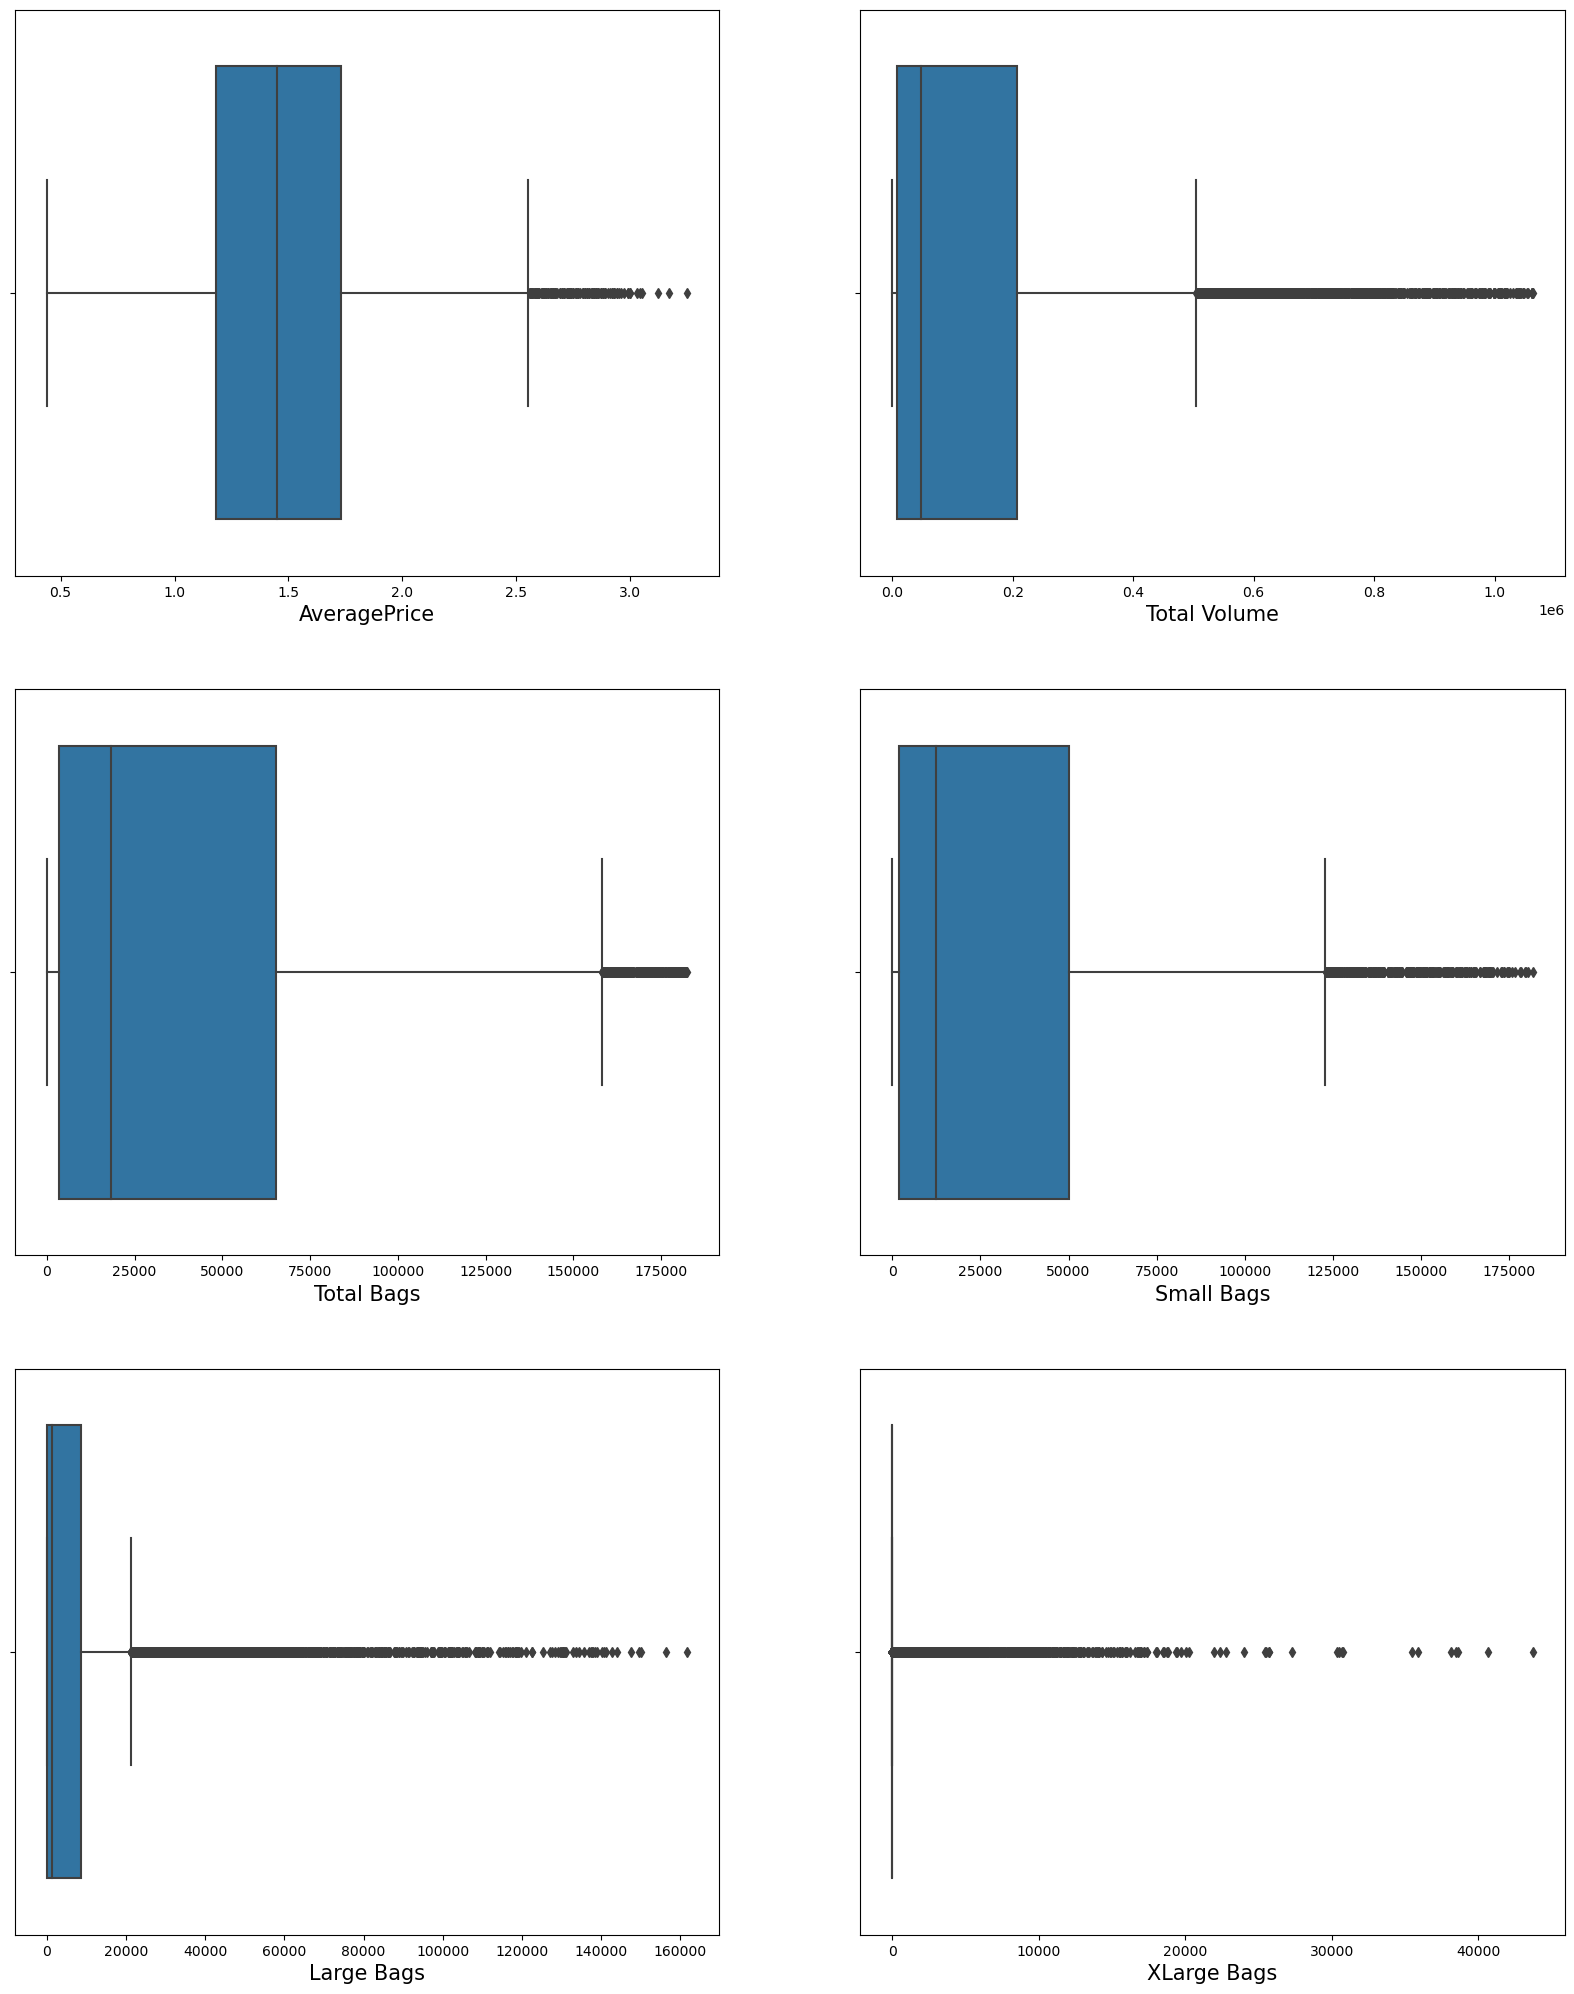

In [257]:
plt.figure(figsize=(20,25))
plotnumber =1
try:
    for column in df_new:
        if plotnumber<=10:
            ax = plt.subplot(3,2,plotnumber)
            sns.boxplot(df_new[column])
            plt.xlabel(column,fontsize=15)
        plotnumber+=1
    plt.show()
except:
    print("Some columns have object or category data type.")

In [258]:
df_new.shape

(14912, 9)

Almost 4000 data is delete as outliers

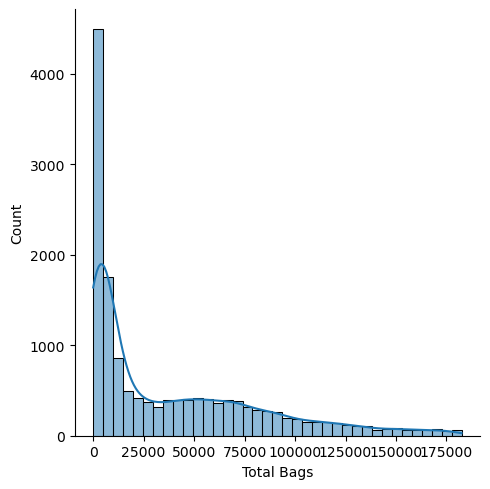

In [259]:
#checking the distribution of data set
sns.displot(df_new, x='Total Bags', kde=True)

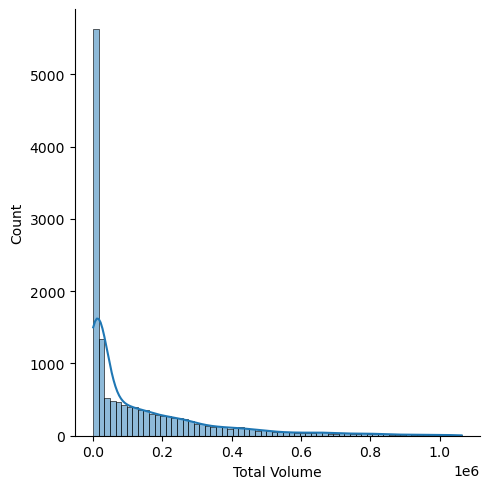

In [283]:
sns.displot(df_new, x='Total Volume', kde=True)

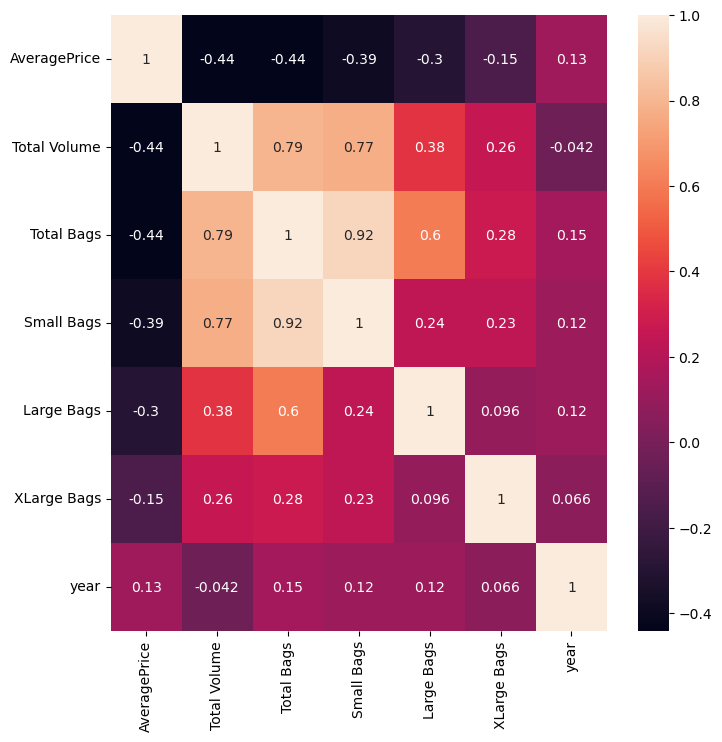

In [261]:

# plotting Heatmap correlation

data_cor= df_new.corr() # checking relationship

plt.figure(figsize=(8,8))
sns.heatmap(data_cor, annot=True, annot_kws={'size':10})
plt.show()

# Treating the categorial features

In [262]:
df_new = pd.get_dummies(df_new,columns=['region'])
df_new.shape

(14912, 62)

In [263]:
# Encode the categorical features

type_wrap = {'conventional':0, 'organic':1}
df_new.type = df_new.type.replace(type_wrap)
df_new.shape

(14912, 62)

In [264]:
df_new.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_Albany,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,1,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
X=df_new.drop('AveragePrice',axis=1)
y= df_new.AveragePrice

In [266]:
y.shape

(14912,)

In [284]:
# applying robust scaler
r_scalar = RobustScaler()

X_scaler= r_scalar.fit_transform(X)

#### Appliying Robust Scaler, this Scaler is robust to outliers. Our data contains many outliers.

In [285]:
x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [286]:
#importing ML models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
from sklearn.model_selection import cross_val_score


# Linear Regression

In [287]:
Lin_reg = LinearRegression()  
Lin_reg.fit(x_train, y_train) #training the algorithm

LinearRegression()

In [288]:
y_predL = Lin_reg.predict(x_test)

In [289]:
print('Mean Absolute Error:', mae(y_test, y_predL)*100)  
print('Mean Squared Error:', mse(y_test, y_predL)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predL)*100)

Mean Absolute Error: 20.0514375256953
Mean Squared Error: 7.199277675358641
Root Mean Squared Error: 52.88040812482644


# Decision Tree Regressor

In [290]:
# create a regressor object
DT_reg= DecisionTreeRegressor()

DT_reg.fit(x_train, y_train)

y_predD = DT_reg.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predD)*100)  
print('Mean Squared Error:', mse(y_test, y_predD)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predD)*100)

Mean Absolute Error: 14.980954935622318
Mean Squared Error: 4.902679721030044
Root Mean Squared Error: 67.91174365446082


# Random Forest Regressor

In [291]:
# create regressor object
Rf_reg = RandomForestRegressor()
  
# fit the regressor with x and y data
Rf_reg.fit(x_train, y_train)  

y_predR = Rf_reg.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predR)*100)  
print('Mean Squared Error:', mse(y_test, y_predR)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predR)*100)

Mean Absolute Error: 11.931161480686695
Mean Squared Error: 2.919714095225322
Root Mean Squared Error: 80.89034167551326


# Gradient Boosting Regressor

In [292]:
Gb_reg = GradientBoostingRegressor()
  
# fit the regressor with x and y data
Gb_reg.fit(x_train, y_train)  

y_predgb = Gb_reg.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predgb)*100)  
print('Mean Squared Error:', mse(y_test, y_predgb)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predgb)*100)

Mean Absolute Error: 17.879641429812697
Mean Squared Error: 5.74534738082585
Root Mean Squared Error: 62.39644642514428


# Support Vector Machines

In [293]:

# create the model object
SV_reg = SVR()

# fit the model on the data
SV_reg.fit(x_train, y_train)

y_predS = SV_reg.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predS)*100)  
print('Mean Squared Error:', mse(y_test, y_predS)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predS)*100)

Mean Absolute Error: 29.559533561567875
Mean Squared Error: 14.121671122499285
Root Mean Squared Error: 7.573035810923567


# KNeighbors Regressor

In [294]:
KNN_reg = KNeighborsRegressor()
# fit the model using the training data and training targets
KNN_reg.fit(x_train, y_train)

y_predK = KNN_reg.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predK)*100)
print('Mean Squared Error:', mse(y_test, y_predK)*100)
print('Root Mean Squared Error:', r2(y_test, y_predK)*100)

Mean Absolute Error: 15.60659871244635
Mean Squared Error: 4.948622639484978
Root Mean Squared Error: 67.61104521431585


# XGBoost Regressor

In [295]:
xgb = xgb.XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [296]:
y_predX =xgb.predict(x_test)

print('Mean Absolute Error:', mae(y_test, y_predX)*100)  
print('Mean Squared Error:', mse(y_test, y_predX)*100)  
print('Root Mean Squared Error:', r2(y_test, y_predX)*100)

Mean Absolute Error: 12.708420271269752
Mean Squared Error: 3.110900744799344
Root Mean Squared Error: 79.63901656955935


## Performance of all Model

In [297]:
result_data= pd.DataFrame(columns=['MAE','MSE','R2-score'])

In [298]:
result_data.loc['LinearRegression']=[mae(y_test,y_predL)*100,mse(y_test,y_predL)*100,r2(y_test,y_predL)*100]

result_data.loc['DecisionTreeRegressor']=[mae(y_test,y_predD)*100,mse(y_test,y_predD)*100,r2(y_test,y_predD)*100]

result_data.loc['Random Forest']=[mae(y_test,y_predR)*100,mse(y_test,y_predR)*100,r2(y_test,y_predR)*100]

result_data.loc['Gradient Boosting']=[mae(y_test,y_predgb)*100,mse(y_test,y_predgb)*100,r2(y_test,y_predgb)*100]

result_data.loc['Support Vector Machines']=[mae(y_test,y_predS)*100,mse(y_test,y_predS)*100,r2(y_test,y_predS)*100]

result_data.loc['K-nearest Neighbors']=[mae(y_test,y_predK)*100,mse(y_test,y_predK)*100,r2(y_test,y_predK)*100]

result_data.loc['XGBoost']=[mae(y_test,y_predX)*100,mse(y_test,y_predX)*100,r2(y_test,y_predX)*100]

In [299]:
result_data

,MAE,MSE,R2-score
LinearRegression,20.051438,7.199278,52.880408
DecisionTreeRegressor,14.980955,4.902680,67.911744
Random Forest,11.931161,2.919714,80.890342
Gradient Boosting,17.879641,5.745347,62.396446
Support Vector Machines,29.559534,14.121671,7.573036
K-nearest Neighbors,15.606599,4.948623,67.611045
XGBoost,12.708420,3.110901,79.639017


For this dataset, XGBoost and Random Forest algorithms have shown best results.

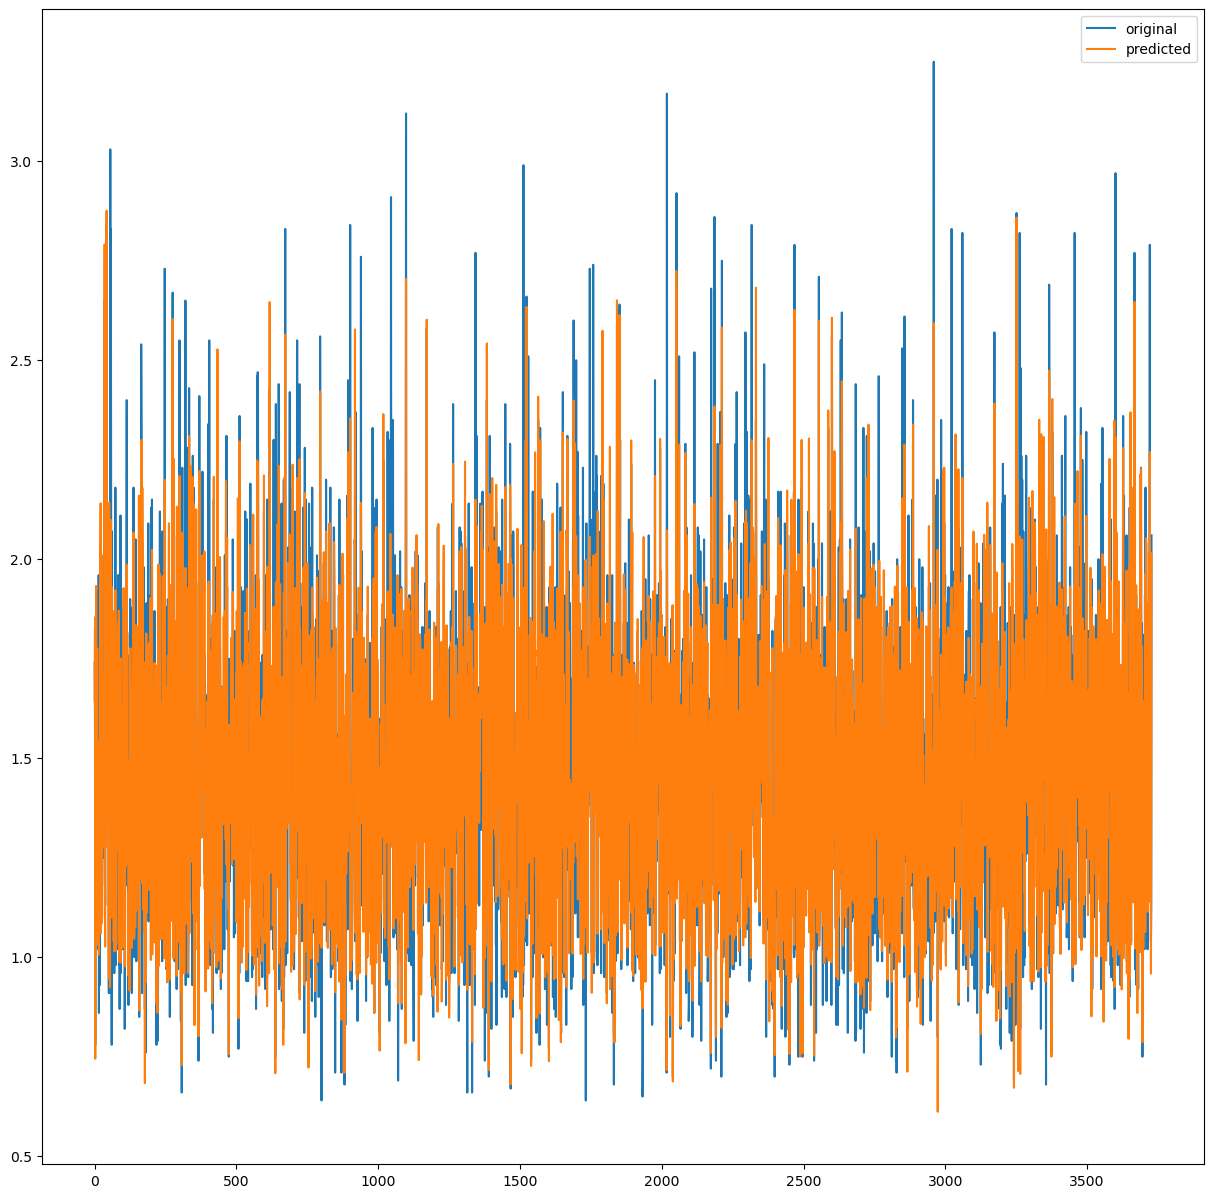

In [323]:
# XGBoost
x_ax = range(len(y_test))
plt.figure(figsize=(15,15))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_predX, label="predicted")
plt.legend()
plt.show()

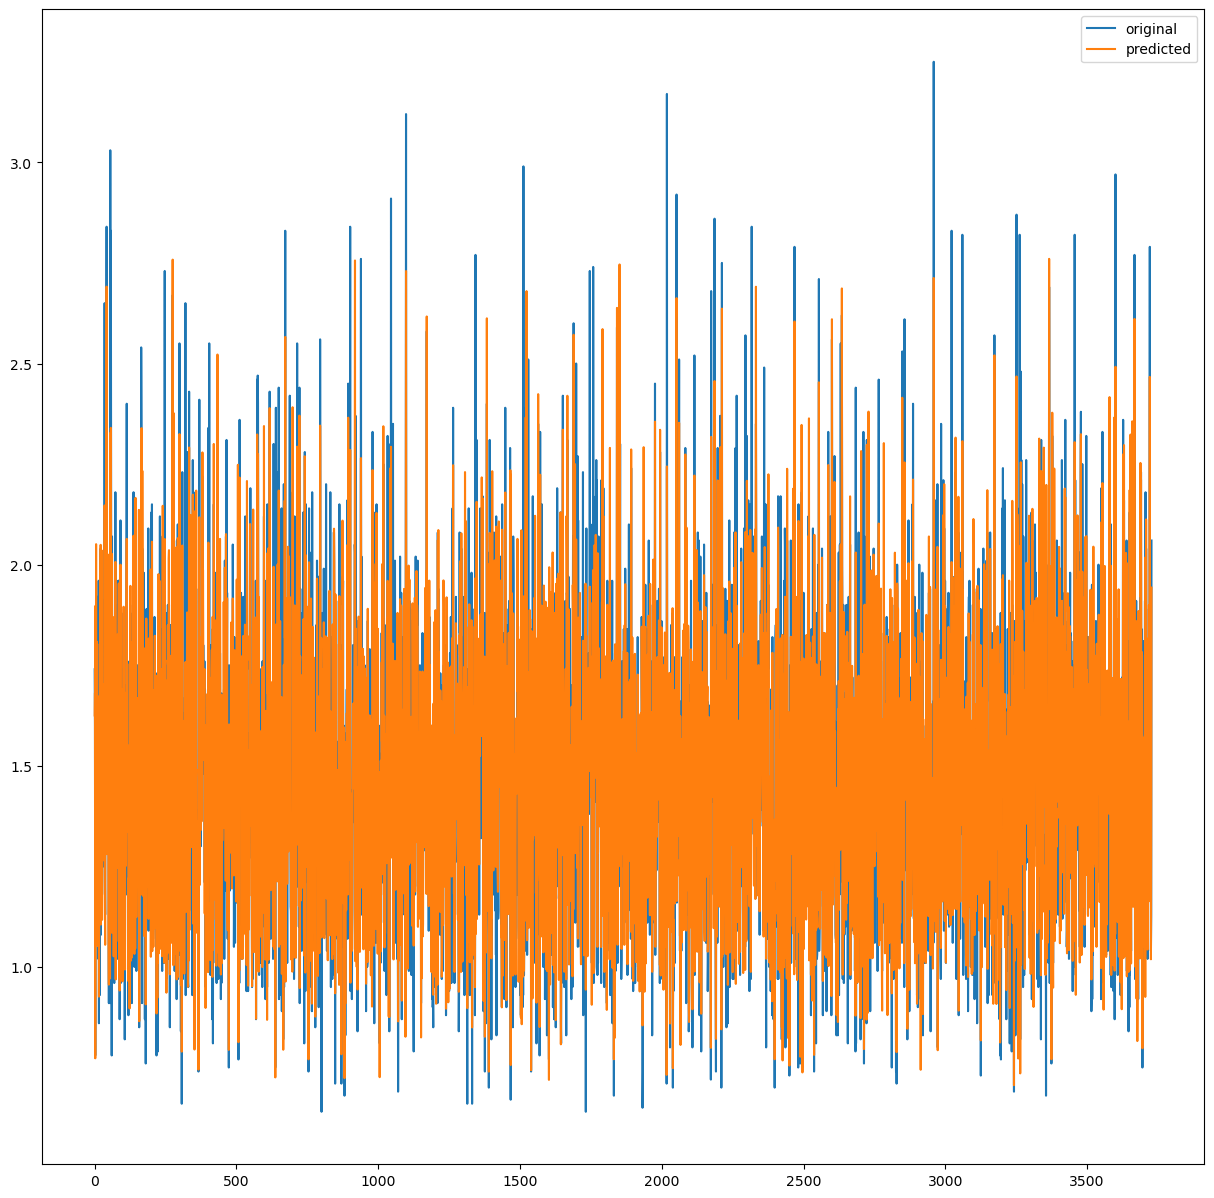

In [324]:
#Random Forest

x_ax = range(len(y_test))
plt.figure(figsize=(15,15))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_predR, label="predicted")
plt.legend()
plt.show()

In [327]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(Rf_reg,x_test,y_test, cv=10, scoring='r2'))

[0.7492274  0.72363609 0.69955385 0.69605062 0.71512631 0.70713105
 0.75194617 0.71817792 0.75660231 0.72422901]


### Saving Random Forest model, it give the best result

In [329]:
import pickle
pickle.dump(Rf_reg, open('Avacado_project.pkl', 'wb'))

In [330]:
pickled_model = pickle.load(open('Avacado_project.pkl', 'rb'))
pickled_model.predict(x_test)

array([1.6252, 1.681 , 0.7729, ..., 1.0191, 1.3641, 1.943 ])

## Classification Problem

In [331]:
df_reg= df.copy()
df_reg

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [332]:
Q1= np.percentile(df_reg['AveragePrice'],25)
Q3= np.percentile(df_reg['AveragePrice'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_reg=df_reg[(df_reg['AveragePrice']>outlier_down) & (df_reg['AveragePrice']<outlier_up)]

In [335]:
Q1= np.percentile(df_reg['Total Volume'],25)
Q3= np.percentile(df_reg['Total Volume'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_reg=df_reg[(df_reg['Total Volume']>outlier_down) & (df_reg['Total Volume']<outlier_up)]

In [338]:
Q1= np.percentile(df_reg['Total Bags'],25)
Q3= np.percentile(df_reg['Total Bags'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_reg=df_reg[(df_reg['Total Bags']>outlier_down) & (df_reg['Total Bags']<outlier_up)]

In [339]:
df_reg.shape

(14739, 9)

Some columns have object or category data type.


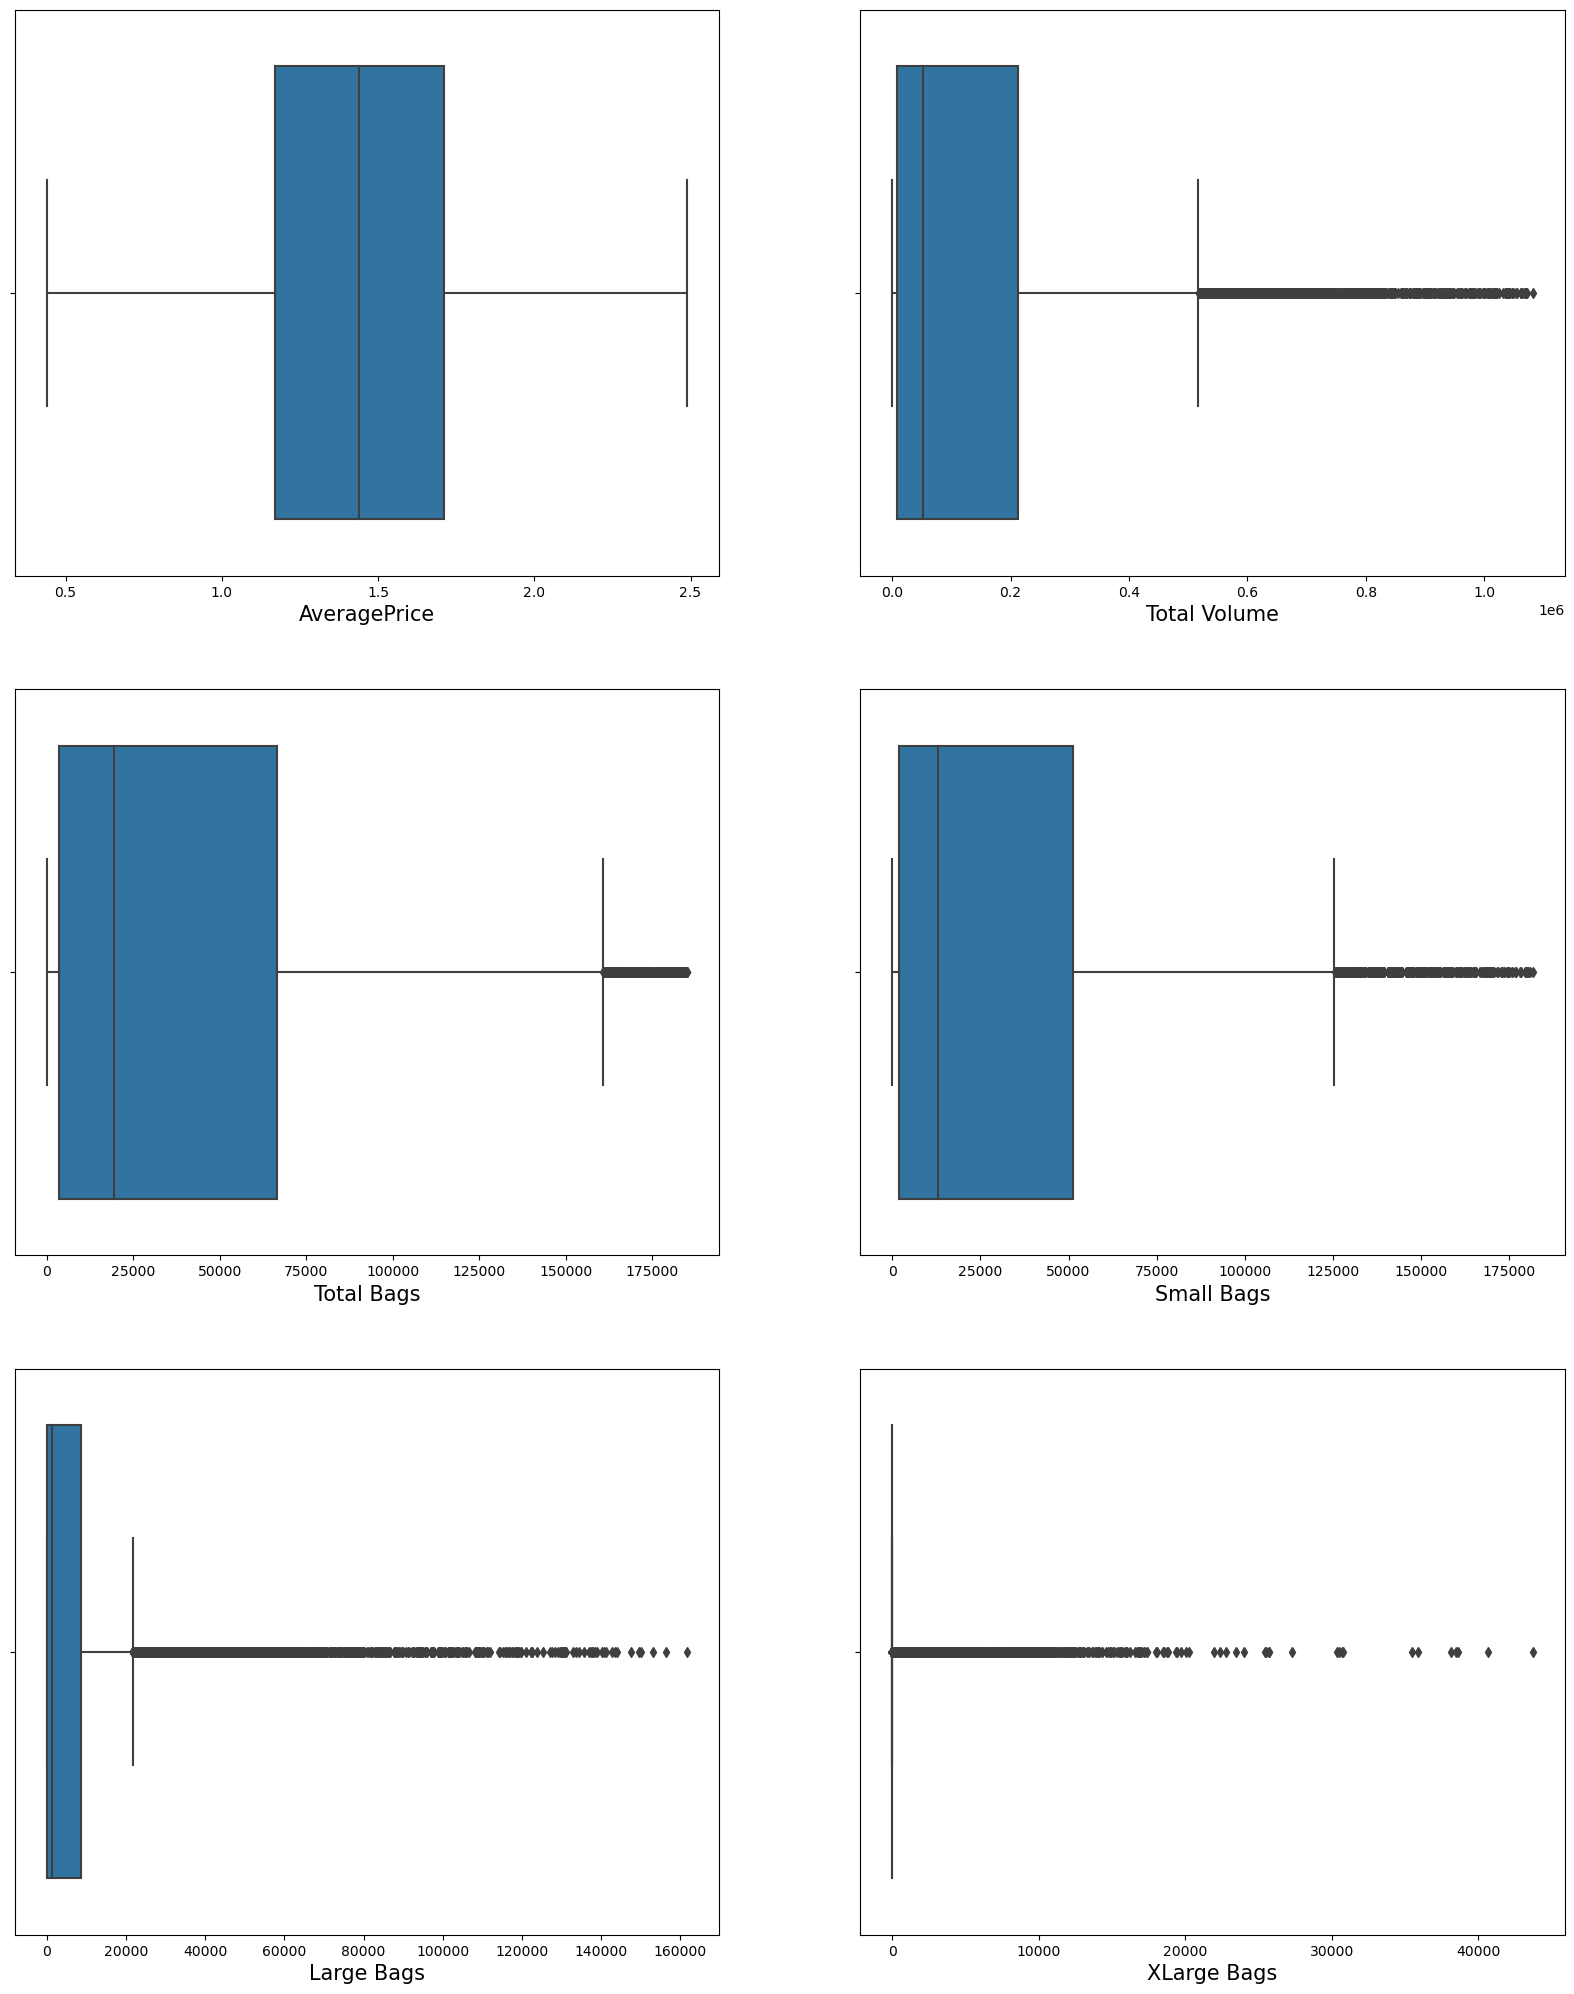

In [340]:
plt.figure(figsize=(20,25))
plotnumber =1
try:
    for column in df_reg:
        if plotnumber<=10:
            ax = plt.subplot(3,2,plotnumber)
            sns.boxplot(df_reg[column])
            plt.xlabel(column,fontsize=15)
        plotnumber+=1
    plt.show()
except:
    print("Some columns have object or category data type.")

In [341]:
# Encode the categorical features

type_w = {'conventional':0, 'organic':1}
df_reg.type = df_reg.type.replace(type_w)
df_reg.shape

(14739, 9)

In [387]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [389]:
df_reg['region_coded']=label_encoder.fit_transform(df_reg['region'])
  
df_reg['region_coded'].unique()

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 47, 48, 49, 50, 53,  6, 15, 22, 25, 29, 35, 45,
       46, 51, 52])

In [390]:
df_reg.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_coded
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,Albany,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,Albany,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,Albany,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,Albany,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,Albany,0


In [391]:
X_reg=df_reg.drop(['region','region_coded'],axis=1)
y_reg= df_reg.region_coded

In [392]:
# applying robust scaler
reg_scalar = RobustScaler()

X_r_scaler= reg_scalar.fit_transform(X_reg)

In [393]:
X_train,X_test,Y_train,Y_test= train_test_split(X_r_scaler, y_reg, test_size=0.25, random_state=42)

In [394]:
#importing ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [395]:
def metric_score(clf,X_train,X_test,Y_train,Y_test, train=True):
    if train:
        y_pred= clf.predict(X_train)
        
        print("\n Train Result:")
        print(f"Accuracy Score:{accuracy_score(Y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred= clf.predict(X_test)
        
        print("\n Test Result:")
        print(f"Accuracy Score:{accuracy_score(Y_test,pred)*100:.2f}%")
        
        
        print('\n \n Test classification report \n',classification_report(Y_test,pred, digits=2))
        

In [396]:
#model training
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [397]:
# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:68.20%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        94
           1       0.56      0.49      0.53        73
           2       0.89      0.80      0.84        71
           3       0.63      0.67      0.65        84
           4       0.72      0.81      0.76        83
           5       0.63      0.58      0.60        97
           6       0.88      0.85      0.86        33
           7       0.59      0.72      0.64        81
           8       0.81      0.90      0.85        91
           9       0.76      0.66      0.70       103
          10       0.54      0.51      0.52        85
          11       0.59      0.71      0.64        51
          12       0.63      0.58      0.60        38
          13       0.61      0.70      0.65        71
          14       0.66      0.75      0.70        71
          15       0.80   

In [398]:
#model training
clf = LogisticRegression()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:4.97%

 Test Result:
Accuracy Score:4.75%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        71
           3       0.05      0.07      0.06        84
           4       0.06      0.27      0.09        83
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        81
           8       0.22      0.09      0.13        91
           9       0.06      0.35      0.10       103
          10       0.00      0.00      0.00        85
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        38
          13       0.04      0.41      0.07        71
          14       0.00      0.00      0.00        71
          15       0.00      

In [399]:
#model training
clf = GradientBoostingClassifier()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:86.88%

 Test Result:
Accuracy Score:56.28%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        94
           1       0.52      0.36      0.42        73
           2       0.75      0.56      0.65        71
           3       0.56      0.57      0.56        84
           4       0.67      0.75      0.70        83
           5       0.61      0.53      0.57        97
           6       0.81      0.67      0.73        33
           7       0.41      0.59      0.49        81
           8       0.70      0.78      0.74        91
           9       0.61      0.55      0.58       103
          10       0.40      0.32      0.36        85
          11       0.53      0.69      0.60        51
          12       0.34      0.34      0.34        38
          13       0.45      0.55      0.50        71
          14       0.66      0.65      0.65        71
          15       0.69    

In [400]:
#model training
clf = KNeighborsClassifier()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:56.64%

 Test Result:
Accuracy Score:36.74%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.33      0.55      0.41        94
           1       0.20      0.36      0.25        73
           2       0.38      0.54      0.44        71
           3       0.21      0.44      0.28        84
           4       0.39      0.53      0.45        83
           5       0.30      0.42      0.35        97
           6       0.82      0.82      0.82        33
           7       0.27      0.48      0.35        81
           8       0.41      0.47      0.44        91
           9       0.25      0.27      0.26       103
          10       0.08      0.11      0.09        85
          11       0.47      0.55      0.50        51
          12       0.26      0.26      0.26        38
          13       0.24      0.32      0.28        71
          14       0.16      0.23      0.19        71
          15       0.67    

In [401]:
#model training
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:54.63%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        94
           1       0.36      0.32      0.34        73
           2       0.70      0.66      0.68        71
           3       0.55      0.61      0.58        84
           4       0.57      0.63      0.59        83
           5       0.50      0.44      0.47        97
           6       0.64      0.64      0.64        33
           7       0.54      0.62      0.57        81
           8       0.78      0.80      0.79        91
           9       0.61      0.57      0.59       103
          10       0.39      0.47      0.43        85
          11       0.51      0.45      0.48        51
          12       0.41      0.39      0.40        38
          13       0.45      0.37      0.40        71
          14       0.61      0.55      0.58        71
          15       0.77   

In [402]:
#model training
clf = SVC()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:3.80%

 Test Result:
Accuracy Score:3.55%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        81
           8       0.13      0.08      0.10        91
           9       0.00      0.00      0.00       103
          10       0.00      0.00      0.00        85
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        38
          13       0.38      0.25      0.30        71
          14       0.15      0.08      0.11        71
          15       0.00      

In [403]:
#model training
clf = xgb.XGBClassifier()
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:65.18%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82        94
           1       0.49      0.48      0.49        73
           2       0.85      0.70      0.77        71
           3       0.63      0.62      0.63        84
           4       0.76      0.81      0.78        83
           5       0.63      0.61      0.62        97
           6       0.88      0.85      0.86        33
           7       0.50      0.64      0.57        81
           8       0.84      0.86      0.85        91
           9       0.66      0.61      0.64       103
          10       0.47      0.47      0.47        85
          11       0.61      0.69      0.65        51
          12       0.52      0.58      0.55        38
          13       0.57      0.65      0.61        71
          14       0.68      0.70      0.69        71
          15       0.86   

### Hyperparameter tunning for Randon Forest Classifier

In [411]:
#n_estimators = [5,20,50,100] # number of trees in the random forest
#max_features = ['auto', 'sqrt'] # number of features in consideration at every split
#max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
#min_samples_split = [2, 6, 10] # minimum sample number to split a node
#min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
#bootstrap = [True, False] # method used to sample data points

para= {'n_estimators': range(20,100),

'max_features': ['auto', 'sqrt'],

'max_depth': range(2,10),

'min_samples_split': range(2,10),

'min_samples_leaf': range(1,8),

'bootstrap': [True, False]}

In [412]:
grid_search= GridSearchCV(estimator=RandomForestClassifier(), param_grid=para, cv=6)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
best_para=grid_search.best_params_
best_para

In [415]:
#model training
clf = RandomForestClassifier(criterion='entropy',max_depth=14,min_samples_leaf=3,min_samples_split=6)
clf.fit(X_train,Y_train)

# for train result 
metric_score(clf,X_train,X_test,Y_train,Y_test, train=True)

# for test result
metric_score(clf,X_train,X_test,Y_train,Y_test, train=False)


 Train Result:
Accuracy Score:93.72%

 Test Result:
Accuracy Score:66.02%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        94
           1       0.55      0.42      0.48        73
           2       0.88      0.73      0.80        71
           3       0.60      0.67      0.63        84
           4       0.72      0.80      0.75        83
           5       0.65      0.57      0.61        97
           6       0.87      0.79      0.83        33
           7       0.56      0.65      0.60        81
           8       0.81      0.87      0.84        91
           9       0.68      0.64      0.66       103
          10       0.54      0.46      0.50        85
          11       0.54      0.67      0.60        51
          12       0.66      0.61      0.63        38
          13       0.54      0.59      0.56        71
          14       0.63      0.80      0.70        71
          15       0.77    

In [417]:
clf

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=3,
                       min_samples_split=6)

In [419]:
Y_pred=clf.predict(X_test)
Y_pred

array([27, 16,  0, ..., 38, 40,  8])

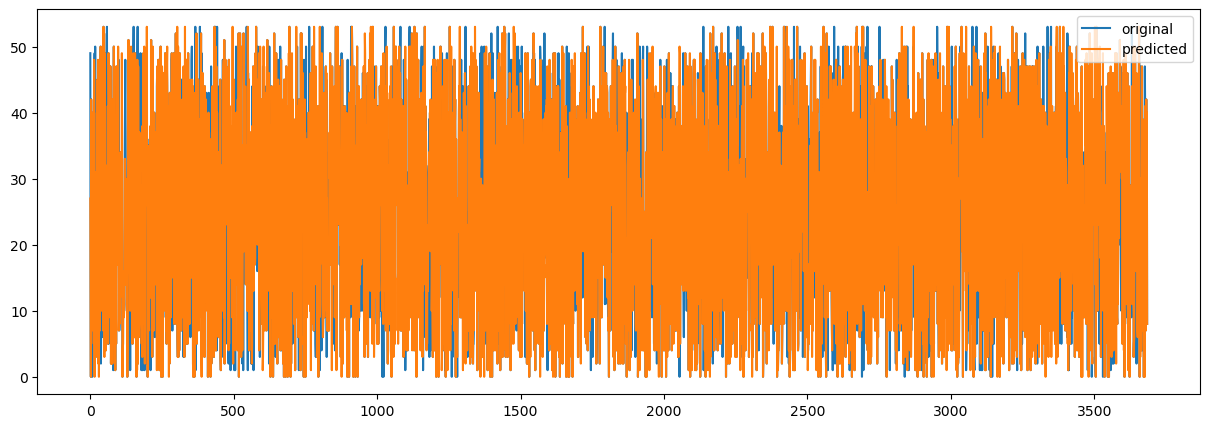

In [421]:
x_ax = range(len(Y_test))
plt.figure(figsize=(15,5))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.legend()
plt.show()

In [422]:
import pickle
pickle.dump(clf, open('Avacado_project_Classification.pkl', 'wb'))

In [423]:
pickled_model = pickle.load(open('Avacado_project_Classification.pkl', 'rb'))
pickled_model.predict(X_test)

array([27, 16,  0, ..., 38, 40,  8])

In [428]:
region= df_reg['region'].unique()
region_c=df_reg['region_coded'].unique()

In [430]:
df_region_data= pd.DataFrame(columns=['Region','Region_coded'])
df_region_data['Region']=region
df_region_data['Region_coded']=region_c

df_region_data

,Region,Region_coded
0,Albany,0
1,Atlanta,1
2,BaltimoreWashington,2
3,Boise,3
4,Boston,4
5,BuffaloRochester,5
6,Charlotte,7
7,Chicago,8
8,CincinnatiDayton,9
9,Columbus,10


## Conculsion

#### In regressor problem Random Forest and XGBoost Model score around 80% of accuracy.
#### For classification problem Random Forest score around 66% of acuracy.